In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample dataframe
date_rng = pd.date_range(start='2018-01-01', end='2022-12-31', freq='H')
df = pd.DataFrame(date_rng, columns=['date'])
df['zone_1'] = np.random.randint(0,100,size=(len(date_rng)))
df['zone_2'] = np.random.randint(0,100,size=(len(date_rng)))
df['zone_3'] = np.random.randint(0,100,size=(len(date_rng)))
df.set_index('date', inplace=True)
df.head()

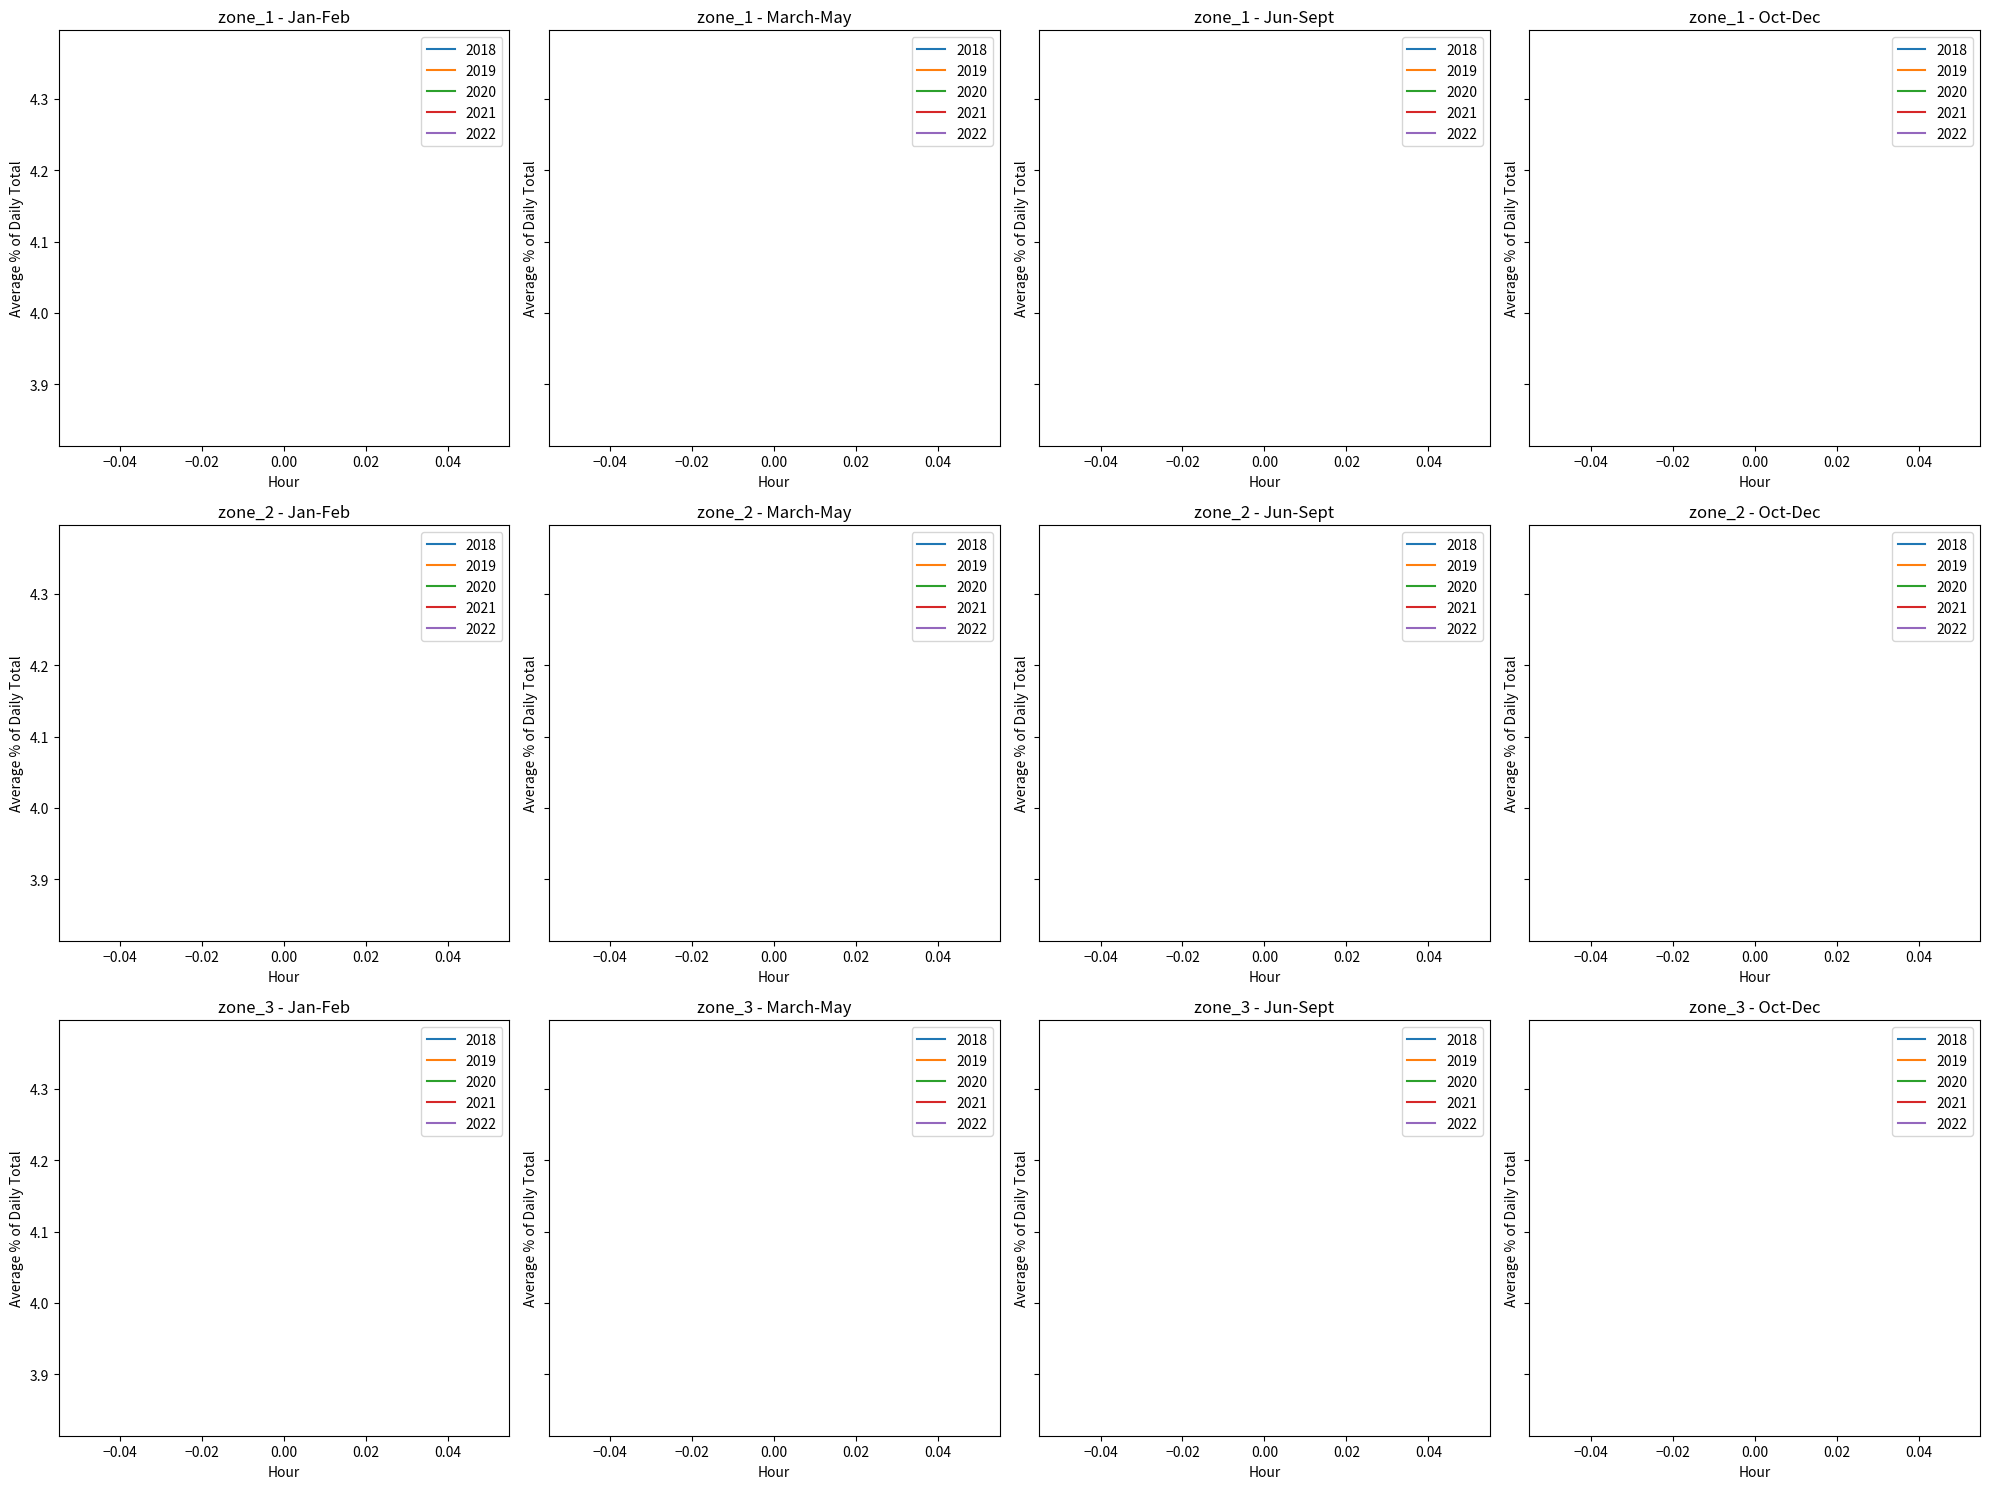

In [ ]:
# Calculate the percentage of the total daily load for each hour
df_daily_sum = df.resample('D').sum()
df_daily_sum = df_daily_sum.stack().reset_index()
df_daily_sum.columns = ['date', 'zone', 'daily_total']
df_hourly = df.stack().reset_index()
df_hourly.columns = ['date', 'zone', 'hourly_load']
df_merged = pd.merge(df_hourly, df_daily_sum, on=['date', 'zone'])
df_merged['percentage'] = (df_merged['hourly_load'] / df_merged['daily_total']) * 100

# Compute the average percentage for each hour for each zone
df_merged['hour'] = df_merged['date'].dt.hour
df_merged['year'] = df_merged['date'].dt.year
df_avg = df_merged.groupby(['zone', 'year', 'hour']).percentage.mean().reset_index()

# Define the time buckets
time_buckets = {
    'Jan-Feb': [1, 2],
    'March-May': [3, 4, 5],
    'Jun-Sept': [6, 7, 8, 9],
    'Oct-Dec': [10, 11, 12]
}

# Plot the results
fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharey=True)
for i, zone in enumerate(df.columns):
    for j, (bucket, months) in enumerate(time_buckets.items()):
        ax = axes[i, j]
        for year in df_avg['year'].unique():
            subset = df_avg[(df_avg['zone'] == zone) & (df_avg['year'] == year) & (df_merged['date'].dt.month.isin(months))]
            ax.plot(subset['hour'], subset['percentage'], label=year)
        ax.set_title(f'{zone} - {bucket}')
        ax.set_xlabel('Hour')
        ax.set_ylabel('Average % of Daily Total')
        ax.legend()
plt.tight_layout()
plt.show()